In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
xls = pd.ExcelFile(r'/Users/siyonabansal/Desktop/RBI.xlsx')
df = pd.read_excel(xls, 'GDP')

print(df.tail())
for m in range(len(df["Year/ Industry"])):
    x= df['Year/ Industry'].iloc[m]
    if pd.isna(x):
        df['Year/ Industry'].iloc[m] = df['Year/ Industry'].iloc[m-1]        
    else:
        continue   
        
df = df.iloc[1:]

difference=[]
for i in range(len(df["Year/ Industry"])-1):
    x=df['Total Gross Value Added at Basic Price'].iloc[i+1]-df['Total Gross Value Added at Basic Price'].iloc[i]
    difference.append(x)
difference.append(0)     

for i in range(len(df["Year/ Industry"])):
    df["Year/ Industry"].iloc[i]= str(df["Year/ Industry"].iloc[i])[:-6]

df["Date"]=df["Year/ Industry"]

for i in range(len(df["Year/ Industry"])):
    if df["Quarter"].iloc[i]=="Q1":
     df["Date"].iloc[i] = df["Year/ Industry"].iloc[i] + "-01"
    elif df["Quarter"].iloc[i]=="Q2":
     df["Date"].iloc[i] = df["Year/ Industry"].iloc[i] + "-04"
    elif df["Quarter"].iloc[i]=="Q3":
     df["Date"].iloc[i] = df["Year/ Industry"].iloc[i] + "-07"
    elif df["Quarter"].iloc[i]=="Q4":
     df["Date"].iloc[i] = df["Year/ Industry"].iloc[i] + "-10"
    
df= df.drop("Quarter", axis='columns')
df= df.drop("Year/ Industry", axis='columns')


df['Difference']=difference  
print(df.head())

   Year/ Industry Quarter  Total Gross Value Added at Basic Price
39            NaN      Q4                            5.973706e+06
40     2022-23         Q1                            5.914443e+06
41            NaN      Q2                            5.915488e+06
42            NaN      Q3                            6.288713e+06
43            NaN      Q4                            6.288713e+06
   Total Gross Value Added at Basic Price     Date     Difference
1                            2.202207e+06  2012-04  154656.755107
2                            2.356864e+06  2012-07   99356.292266
3                            2.456220e+06  2012-10  -14842.635513
4                            2.441377e+06  2013-01   70475.115117
5                            2.511852e+06  2013-04  194292.845087


/Users/siyonabansal/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [3]:
# Specify the quantiles you want to estimate
quantiles = [0.25, 0.50, 0.75]

# Perform quantile regression for each quantile
models = {}
for q in quantiles:
    model = sm.QuantReg(df['Difference'], sm.add_constant(df.index)).fit(q=q)
    models[q] = model
    
# Predict the quantile values for the entire time range
predictions = pd.DataFrame(index=df.index) # stores the predicted values 
predictions["Date"] = df['Date']
for q, model in models.items():
    print(q, model)
    predictions[f'q_{q}'] = model.predict(sm.add_constant(df.index))
print(predictions.head())

0.25 <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8e5097cbb0>
0.5 <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8e5097caf0>
0.75 <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8e630a06a0>
      Date        q_0.25         q_0.5         q_0.75
1  2012-04  28452.300494  72284.508810   93599.546945
2  2012-07  27749.557991  71968.475202   99356.292265
3  2012-10  27046.815487  71652.441594  105113.037584
4  2013-01  26344.072984  71336.407986  110869.782904
5  2013-04  25641.330481  71020.374378  116626.528223


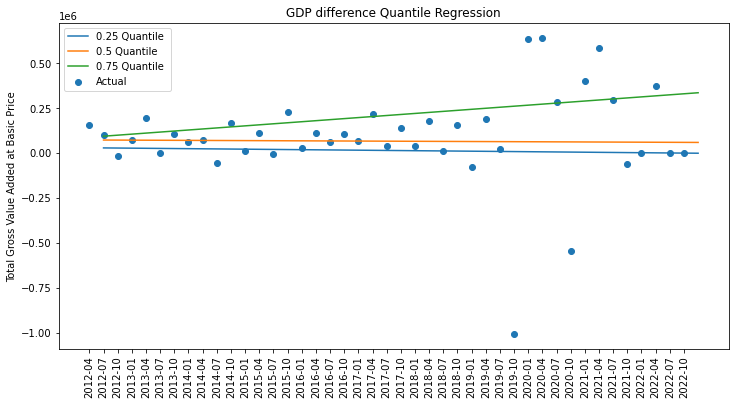

In [4]:
# Plot the actual values and the quantile predictions
plt.figure(figsize=(12,6))
plt.scatter(df['Date'], df['Difference'], label='Actual')
for q in quantiles:
    plt.plot(df.index, predictions[f'q_{q}'], label=f'{q} Quantile ')
plt.legend()
plt.ylabel('Total Gross Value Added at Basic Price')
plt.title('GDP difference Quantile Regression')
plt.xticks( rotation='vertical')
plt.show()

#### With the onset of covid there were huge fluctuations in GDP.

In [5]:
df1 = pd.read_excel(xls, 'Foreign exchange reserves')
df1 = df1.iloc[:-32]
print(df1.head())
diff=[]
for i in range(len(df1["Date"])-1):
    x=df1['Ruppee'].iloc[i+1]-df1['Ruppee'].iloc[i]
    diff.append(x)
diff.append(0)

df1['Diff']=diff

df1

        Date     Ruppee
0 2012-04-06  1495700.0
1 2012-04-13  1506630.0
2 2012-04-20  1529660.0
3 2012-04-27  1551860.0
4 2012-05-04  1571730.0


,Date,Ruppee,Diff
0,2012-04-06,1495700.00,10930.00
1,2012-04-13,1506630.00,23030.00
2,2012-04-20,1529660.00,22200.00
3,2012-04-27,1551860.00,19870.00
4,2012-05-04,1571730.00,-9480.00
...,...,...,...
547,2022-09-30,4333987.30,52948.59
548,2022-10-07,4386935.89,-35119.80
549,2022-10-14,4351816.09,-14729.18
550,2022-10-21,4337086.91,42628.04


In [6]:
FER_models={}
for q in quantiles:
    FER_model = sm.QuantReg(df1['Diff'], sm.add_constant(df1.index)).fit(q=q)
    FER_models[q] = FER_model
    
# Predict the quantile values for the entire time range
FER_predictions = pd.DataFrame(index=df1.index) # stores the predicted values 
FER_predictions["Date"] = df1['Date']
for q, model in FER_models.items():
    print(q, model)
    FER_predictions[f'q_{q}'] = model.predict(sm.add_constant(df1.index))
print(FER_predictions.head())
print(len(FER_predictions))

0.25 <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8e63923580>
0.5 <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8e61138e50>
0.75 <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8e10027f70>
        Date       q_0.25    q_0.5        q_0.75
0 2012-04-06 -5290.216318  3258.72  12655.854967
1 2012-04-13 -5301.455094  3259.68  12675.219613
2 2012-04-20 -5312.693869  3260.64  12694.584258
3 2012-04-27 -5323.932645  3261.60  12713.948903
4 2012-05-04 -5335.171420  3262.56  12733.313548
552


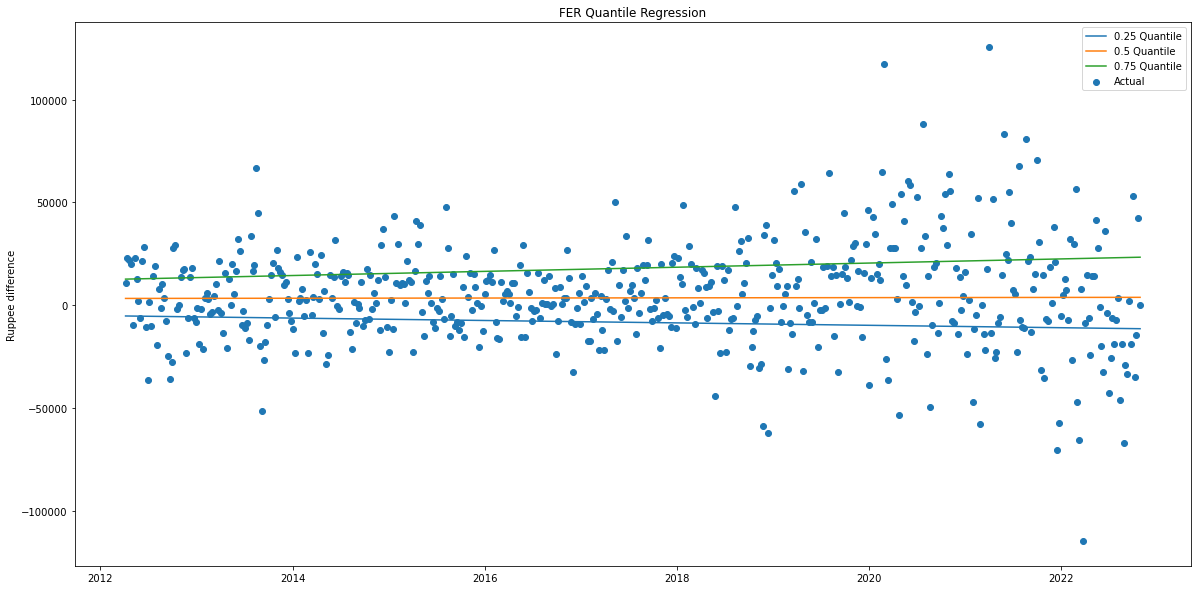

In [7]:
# Plot the actual values and the quantile predictions
plt.figure(figsize=(20, 10))

plt.scatter(df1['Date'], df1['Diff'], label='Actual')

for q in quantiles:
    plt.plot(df1['Date'], FER_predictions[f'q_{q}'], label=f'{q} Quantile')
    
plt.legend()
plt.ylabel('Ruppee difference')
plt.title('FER Quantile Regression')
plt.show()

## Conclusions from Quantile regresion

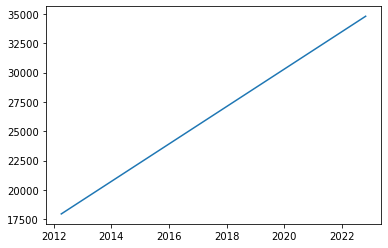

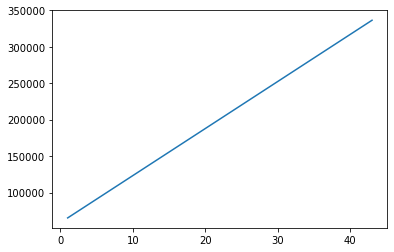

In [8]:
# Quantifying uncertainty: 
# Quantile regression allows you to estimate different quantiles of the target variable distribution. This feature enables you to quantify the uncertainty associated with the target variable at specific quantiles. 
# For example, if you are interested in the 75th percentile (quantile), the corresponding quantile line can provide insight into the upper range of the target variable distribution.
ranges1=[]
ranges2=[]
for i in range(len(FER_predictions)):
    ranges1.append(FER_predictions["q_0.75"].iloc[i] - FER_predictions["q_0.25"].iloc[i])
    
for i in range(len(predictions)):
    ranges2.append(predictions["q_0.75"].iloc[i] - predictions["q_0.25"].iloc[i])
  
plt.plot(df1['Date'], ranges1)
plt.show()
plt.plot(df.index, ranges2)
plt.show()

#### Range of deviation for foriegn reserves keeps on increasing

# Predictions interval


1.1503493803760079
          Date      Ruppee      Diff   Lower Bound   Upper Bound
0   2012-04-06  1495700.00  10930.00 -1.137473e+06  1.162785e+06
1   2012-04-13  1506630.00  23030.00 -1.137454e+06  1.162804e+06
2   2012-04-20  1529660.00  22200.00 -1.137434e+06  1.162824e+06
3   2012-04-27  1551860.00  19870.00 -1.137415e+06  1.162843e+06
4   2012-05-04  1571730.00  -9480.00 -1.137396e+06  1.162862e+06
..         ...         ...       ...           ...           ...
547 2022-09-30  4333987.30  52948.59 -1.126881e+06  1.173377e+06
548 2022-10-07  4386935.89 -35119.80 -1.126861e+06  1.173397e+06
549 2022-10-14  4351816.09 -14729.18 -1.126842e+06  1.173416e+06
550 2022-10-21  4337086.91  42628.04 -1.126823e+06  1.173435e+06
551 2022-10-28  4379714.95      0.00 -1.126803e+06  1.173455e+06

[552 rows x 5 columns]


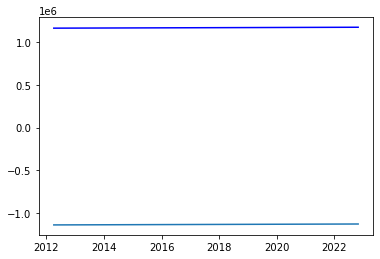

In [9]:
from scipy.stats import norm
# Calculate the residuals (observed - predicted)
residuals = df1['Ruppee'] - FER_predictions["q_0.75"]


# Calculate the standard deviation of the residuals
residual_std = residuals.std()

# Set the desired significance level (e.g., 0.05 for a 95% prediction interval)
significance_level = 0.25

# Calculate the critical value for the desired significance level
z_value = norm.ppf(1 - (significance_level / 2))
print(z_value)

# Calculate the prediction interval
lower_bound = FER_predictions["q_0.75"] - (z_value * residual_std)
upper_bound = FER_predictions["q_0.75"] + (z_value * residual_std)

# Create a DataFrame to store the prediction intervals
prediction_intervals = pd.DataFrame({'Lower Bound': lower_bound, 'Upper Bound': upper_bound})

# Merge the prediction intervals with the original DataFrame
df1_with_intervals = pd.concat([df1, prediction_intervals], axis=1)

# Print the DataFrame with prediction intervals
print(df1_with_intervals)

plt.plot(df1_with_intervals['Date'] ,df1_with_intervals['Lower Bound'])
plt.plot(df1_with_intervals['Date'] ,df1_with_intervals['Upper Bound'], color='Blue')
plt.show()

In [84]:
# All the factors are recorded at various frequencies. We want these values on a daily frequency for modeling purpose.
# Here we are interpolating the last recorded value to repeat for the dates till the next recorded value.
# After this we are able to join factors like GDP, FEI, etc.

var = pd.DataFrame()
var["Weekly"]= df1['Date'].iloc[:-36] # weekly data
var["FEI"] = df1['Ruppee'].iloc[:-36]
var["GDP"] = 0

for i in range(len(df["Total Gross Value Added at Basic Price"])*12):
    var["GDP"].iloc[i] = df["Total Gross Value Added at Basic Price"].iloc[i//12]

#finding correlation between GDP AND FEI trends

var["Corr"] = var["GDP"].corr(var["FEI"])

# Perform quantile regression for each quantile
models = {}
for q in quantiles:
    model = sm.QuantReg(var['GDP'], sm.add_constant(var.index)).fit(q=q)
    models[q] = model

Models = {}
for q in quantiles:
    model = sm.QuantReg(var['FEI'], sm.add_constant(var.index)).fit(q=q)
    Models[q] = model    
    
#Predict the quantile values for the entire time range
Predictions = pd.DataFrame(index=var.index) # stores the predicted values 
Predictions["Date"] = var["Weekly"]
for q, model in models.items():
    print(q, model)
    Predictions[f'GDP_{q}'] = model.predict(sm.add_constant(var.index))
for q, model in Models.items():
    print(q, model)
    Predictions[f'q_{q}'] = model.predict(sm.add_constant(var.index))
print(Predictions)

0.25 <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8e643df6d0>
0.5 <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8e639a7c10>
0.75 <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8e639d7160>
0.25 <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8e639a1250>
0.5 <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8e613f47f0>
0.75 <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8e51c7f8e0>
          Date      GDP_0.25       GDP_0.5      GDP_0.75        q_0.25  \
0   2012-04-06  2.085399e+06  2.117634e+06  2.119063e+06  1.379946e+06   
1   2012-04-13  2.092302e+06  2.124802e+06  2.126890e+06  1.384228e+06   
2   2012-04-20  2.099205e+06  2.131969e+06  2.134718e+06  1.388511e+06   
3   2012-04-27  2.106107e+06  2.139137e+06  2.142546e+06  1.392794e+06   
4   2012-05-04  2.113010e+06  2.146304e+06  2.150373e+06  1.397076e+06   


/Users/siyonabansal/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


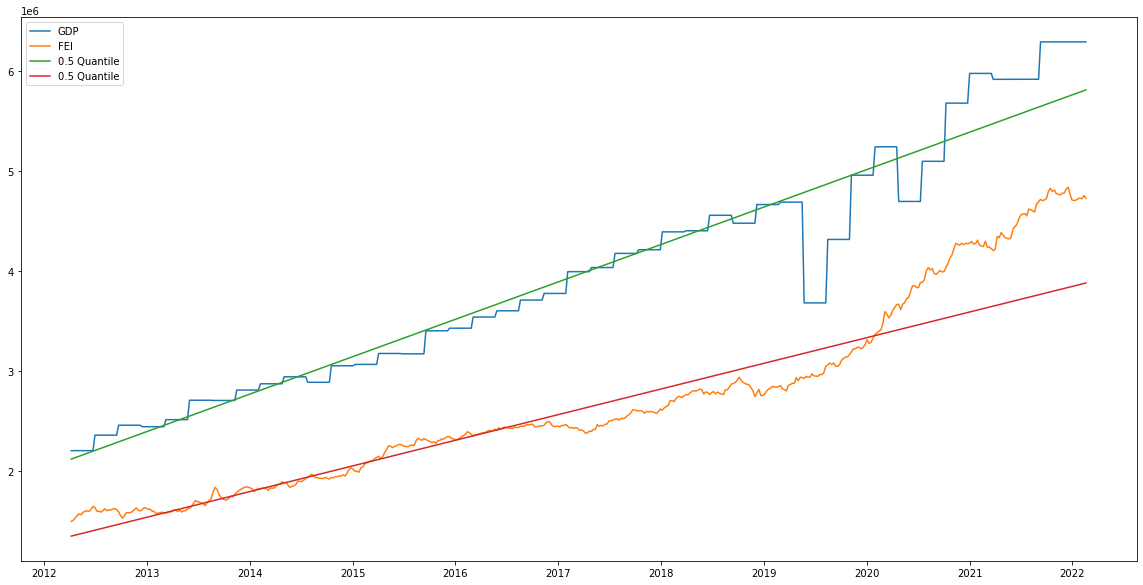

In [88]:
plt.figure(figsize=(20, 10))
plt.plot(var["Weekly"], var["GDP"],label="GDP")
plt.plot(var["Weekly"], var["FEI"],label="FEI")
plt.plot(Predictions["Date"], Predictions["GDP_0.5"],label="0.5 Quantile")
plt.plot(Predictions["Date"], Predictions["q_0.5"],label="0.5 Quantile")
plt.legend()
plt.show()

In [91]:
var.corr() # GDP and FEI are highly correlated 

,FEI,GDP,Corr
FEI,1.00000,0.96711,NaN
GDP,0.96711,1.00000,NaN
Corr,NaN,NaN,NaN


In [95]:
from sklearn.model_selection import train_test_split
X = var["Weekly"]
y= var["GDP"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
y_train

0      2.202207e+06
1      2.202207e+06
2      2.202207e+06
3      2.202207e+06
4      2.202207e+06
           ...     
407    4.956006e+06
408    5.239579e+06
409    5.239579e+06
410    5.239579e+06
411    5.239579e+06
Name: GDP, Length: 412, dtype: float64